# L-SHADE

In [8]:
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
FUNCTIONS = {
    1: {"Description": "Unimodal Function", "Optimum": 100},
    2: {"Description": "Basic Function", "Optimum": 1100},
    3: {"Description": "Basic Function", "Optimum": 700},
    4: {"Description": "Basic Function", "Optimum": 1900},
    5: {"Description": "Hybrid Function", "Optimum": 1700},
    6: {"Description": "Hybrid Function", "Optimum": 1600},
    7: {"Description": "Hybrid Function", "Optimum": 2100},
    8: {"Description": "Composition Function", "Optimum": 2200},
    9: {"Description": "Composition Function", "Optimum": 2400},
    10: {"Description": "Composition Function", "Optimum": 2500},
}

### Linear congruential

In [10]:
lcg_df = pd.read_csv('results/linear_congruential.csv')
lcg_df['Method'] = 'Linear Congruential'
lcg_df['Error'] = lcg_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

lcg_result = lcg_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

lcg_result['CV'] = lcg_result['Std Error'] / lcg_result['Mean Error']
lcg_result['Function'] = "F" + lcg_result['Function'].astype(str)
lcg_result = lcg_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

lcg_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.00000,0.000000,NaN,10,51
1,F2,9.838679,6.716580,0.30600,30.280140,0.682671,10,51
2,F3,12.268588,0.835856,10.96541,14.602876,0.068130,10,51
3,F4,0.396400,0.078176,0.23800,0.594040,0.197216,10,51
4,F5,1.166284,1.125403,0.00000,5.391080,0.964948,10,51
5,F6,0.374955,0.205148,0.01434,0.926360,0.547128,10,51
6,F7,0.402981,0.310434,0.00003,1.129810,0.770345,10,51
7,F8,96.091895,19.606787,0.00000,100.398820,0.204042,10,51
8,F9,309.863487,65.772987,100.00000,334.400000,0.212264,10,51
9,F10,412.415814,21.542117,397.74287,445.801970,0.052234,10,51


### Mersenne Twister

In [11]:
mt_df = pd.read_csv('results/mersenne_twister.csv')
mt_df['Method'] = 'Mersenne Twister'
mt_df['Error'] = mt_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

mt_result = mt_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

mt_result['CV'] = mt_result['Std Error'] / mt_result['Mean Error']
mt_result['Function'] = "F" + mt_result['Function'].astype(str)
mt_result = mt_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

mt_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.000000,0.000000,NaN,10,51
1,F2,9.854064,6.335806,0.398840,27.339420,0.642964,10,51
2,F3,12.235120,0.667897,10.997029,13.570348,0.054588,10,51
3,F4,0.401352,0.067621,0.232670,0.543670,0.168483,10,51
4,F5,1.345945,1.953674,0.000000,10.365850,1.451525,10,51
5,F6,0.415999,0.238116,0.020480,1.093430,0.572395,10,51
6,F7,0.406339,0.273706,0.000000,1.124290,0.673589,10,51
7,F8,100.012454,0.062519,100.000000,100.346110,0.000625,10,51
8,F9,278.243219,96.429715,100.000000,334.785990,0.346566,10,51
9,F10,411.486232,21.095622,397.742870,445.812900,0.051267,10,51


### True random

In [12]:
true_df = pd.read_csv('results/true_random.csv')
true_df['Method'] = 'True Random'
true_df['Error'] = true_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

true_result = true_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

true_result['CV'] = true_result['Std Error'] / true_result['Mean Error']
true_result['Function'] = "F" + true_result['Function'].astype(str)
true_result = true_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

true_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.000000,0.000000,NaN,10,51
1,F2,8.726651,5.807791,0.332550,27.104770,0.665523,10,51
2,F3,12.003601,0.624774,11.103017,13.243463,0.052049,10,51
3,F4,0.380814,0.072474,0.246770,0.593610,0.190314,10,51
4,F5,1.162776,1.567259,0.208140,11.172960,1.347860,10,51
5,F6,0.405445,0.265860,0.022340,1.217030,0.655725,10,51
6,F7,0.350964,0.278525,0.000010,0.897400,0.793602,10,51
7,F8,100.000000,0.000000,100.000000,100.000000,0.000000,10,51
8,F9,283.734956,97.545011,0.000000,335.966690,0.343789,10,51
9,F10,411.469716,21.106543,397.742870,445.803260,0.051295,10,51


### Plots

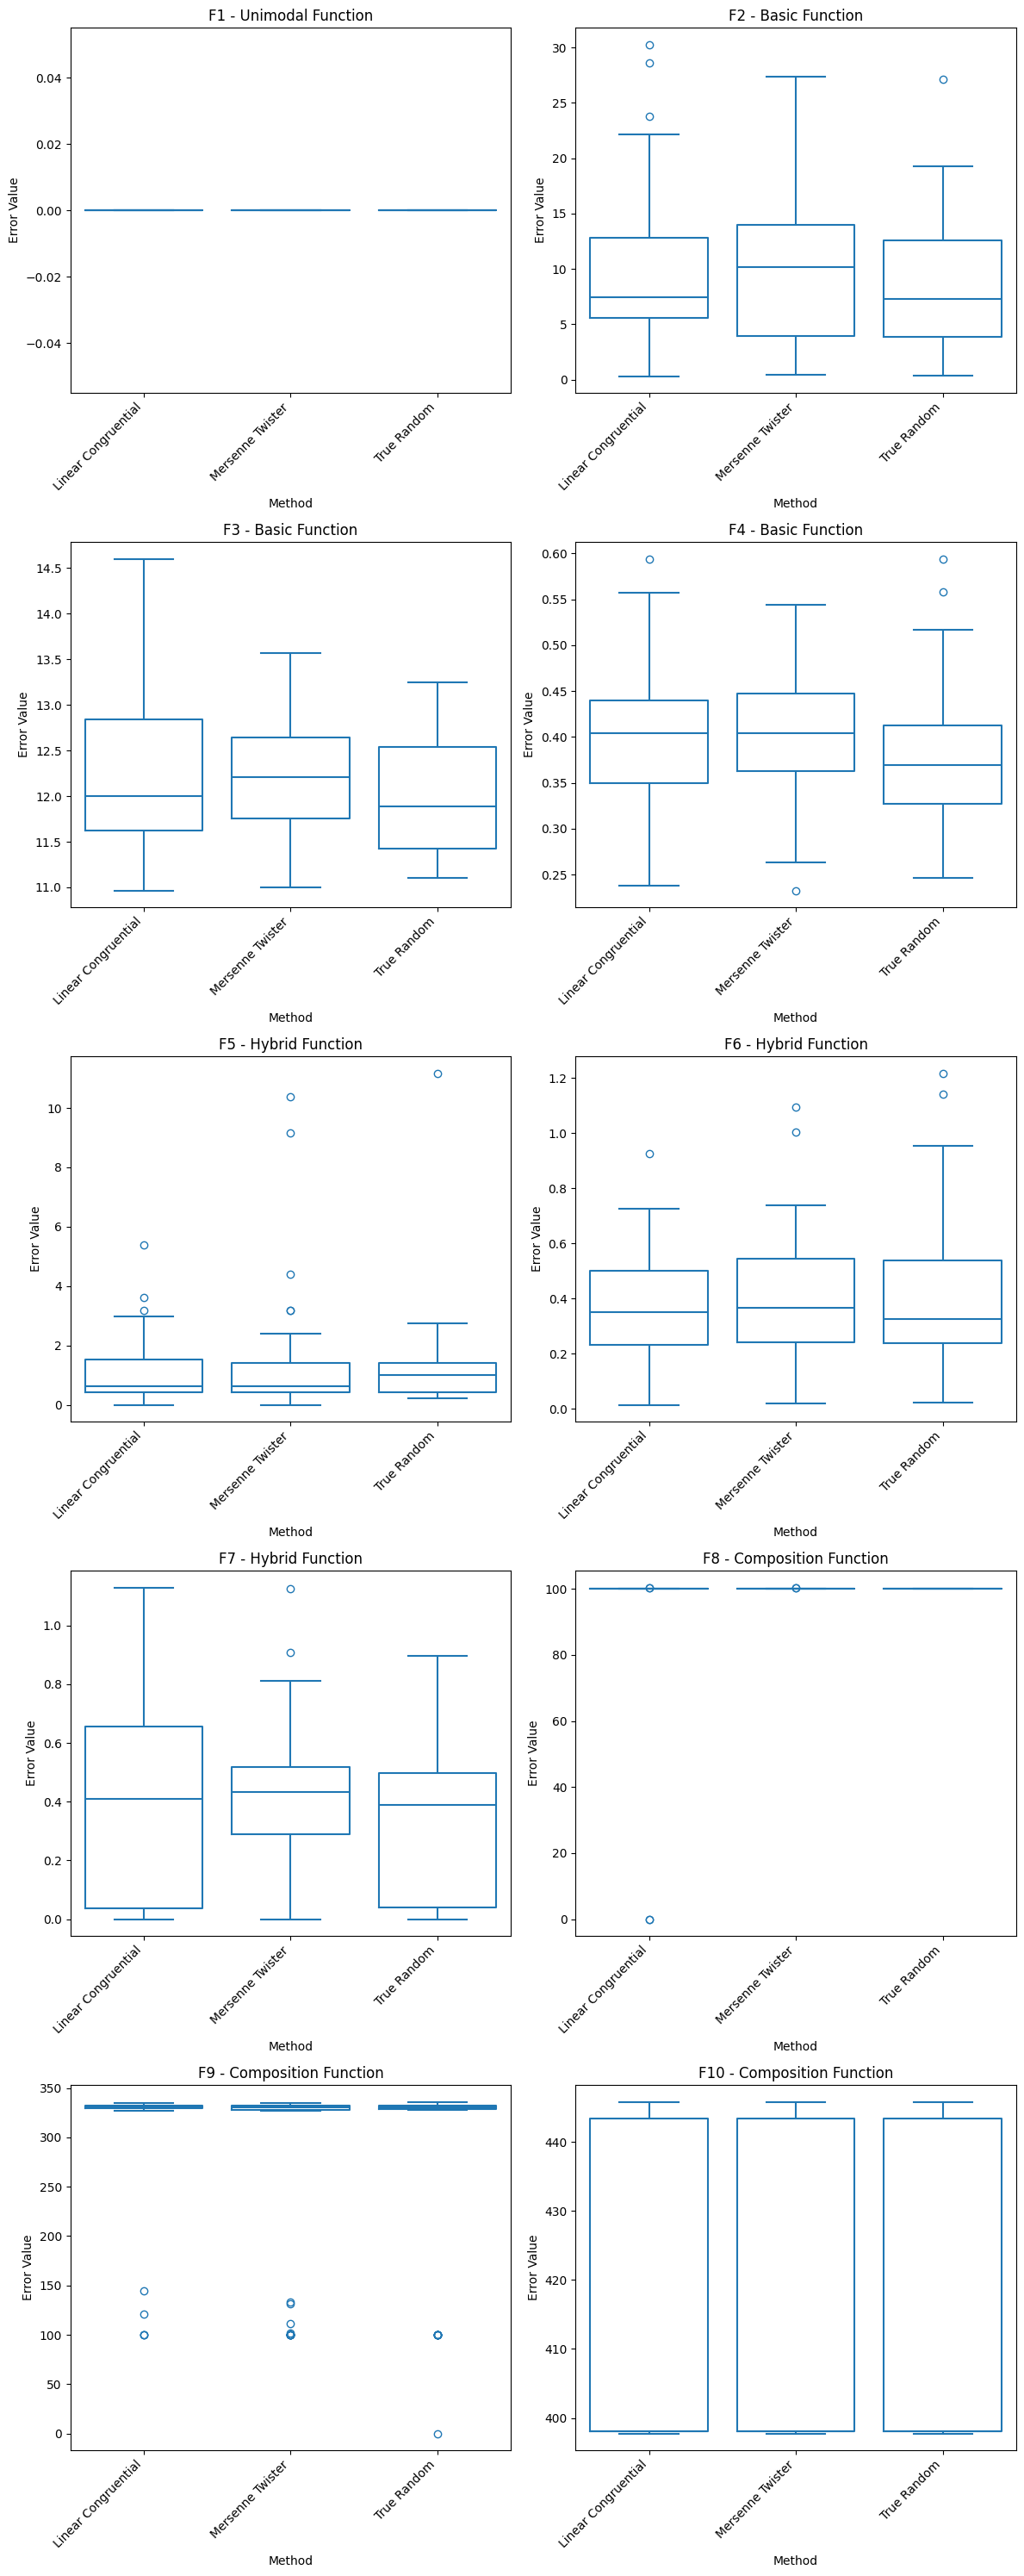

In [13]:
combined_df = pd.concat([lcg_df, mt_df, true_df], ignore_index=True)
plt.figure(figsize=(12, 30))

for i, function in enumerate(FUNCTIONS.keys()):
    plt.subplot(5, 2, i + 1)
    data = combined_df[combined_df['Function'] == function]
    sns.boxplot(data=data, x='Method', y='Error', fill=False)

    plt.title(f'F{function} - {FUNCTIONS[function]["Description"]}')
    plt.xlabel('Method')
    plt.ylabel('Error Value')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../imgs/box_lshade.png', dpi=300, bbox_inches='tight')
plt.show()

### Wilcoxon signed-rank test

In [14]:
lcg_errors = [np.array(lcg_df[lcg_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]
mt_errors = [np.array(mt_df[mt_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]
true_errors = [np.array(true_df[true_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]

for i in range(1, 10):
    print(f"--- Function {i+1} ---")

    res = wilcoxon(true_errors[i], lcg_errors[i])
    print(f"\tTrue Random vs Linear Congruential: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(true_errors[i], mt_errors[i])
    print(f"\tTrue Random vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(lcg_errors[i], mt_errors[i])
    print(f"\tLinear Congruential vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}\n")

--- Function 2 ---
	True Random vs Linear Congruential: statistic = 578.00, p-value = 0.43
	True Random vs Mersenne-Twister: statistic = 594.00, p-value = 0.52
	Linear Congruential vs Mersenne-Twister: statistic = 659.00, p-value = 0.97

--- Function 3 ---
	True Random vs Linear Congruential: statistic = 462.00, p-value = 0.06
	True Random vs Mersenne-Twister: statistic = 520.00, p-value = 0.18
	Linear Congruential vs Mersenne-Twister: statistic = 630.00, p-value = 0.76

--- Function 4 ---
	True Random vs Linear Congruential: statistic = 499.00, p-value = 0.12
	True Random vs Mersenne-Twister: statistic = 466.00, p-value = 0.06
	Linear Congruential vs Mersenne-Twister: statistic = 604.00, p-value = 0.58

--- Function 5 ---
	True Random vs Linear Congruential: statistic = 434.00, p-value = 0.64
	True Random vs Mersenne-Twister: statistic = 501.00, p-value = 0.67
	Linear Congruential vs Mersenne-Twister: statistic = 558.50, p-value = 0.95

--- Function 6 ---
	True Random vs Linear Congru